In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Regression Dataset - Quadratic</h2>
Input Feature: X  

Target: 5x^2-23x + 47 + some noise

Objective: Train a model to predict target for a given X

In [2]:
# Quadratic Function
def quad_func (x):
    return 5*x**2 -23*x

In [3]:
quad_func(25)

2550

In [4]:
quad_func(1.254)

-20.979419999999998

In [5]:
np.random.seed(5)
x = pd.Series(np.arange(-20,21,0.2))
# Add random noise
y = x.map(quad_func) + np.random.randn(len(x)) * 30

df = pd.DataFrame({'myx':x,'myy':y})

In [6]:
df.head()

,myx,myy
0,-20.0,2473.236825
1,-19.8,2405.673895
2,-19.6,2444.523136
3,-19.4,2320.437236
4,-19.2,2288.088295


In [7]:
# Correlation will indicate how strongly features are related to the output
df.corr()

,myx,myy
myx,1.000000,-0.339751
myy,-0.339751,1.000000


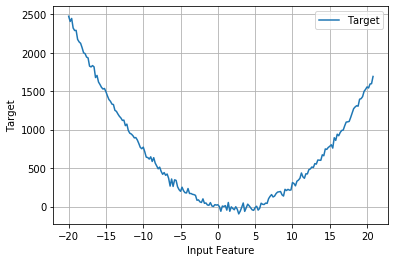

In [9]:
plt.plot(df.myx,df.myy,label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [11]:
# Save all data
df.to_csv('quadratic_all.csv',index=False,
          columns=['myx','myy'])

<h2>SageMaker Convention for Training and Validation files</h2>

CSV File Column order: y_noisy, x

Training, Validation files do not have a column header

In [12]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [13]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows-train

In [14]:
rows, train, test

(205, 143, 62)

In [16]:
# Write Training Set
df[:train].to_csv('quadratic_train.csv',index=False,header=False,columns=['myy','myx'])

In [17]:
# Write Validation Set
df[train:].to_csv('quadratic_validation.csv',index=False,header=False,columns=['myy','myx'])

In [18]:
print ("finito")

finito
